In [1]:
from h5glance import H5Glance

import os
import sys
import h5py
import math
import numpy  as np
import pandas as pd

from scipy    import stats
from datetime import datetime, timezone

from lgdo import LH5Store #If this fails, try pip install legend-pydataobj
import lgdo.lh5_store as lh5

import matplotlib.pyplot as plt

from legendmeta import LegendMetadata
#from pygama.flow import DataLoader

from scipy import stats as st

In [2]:
repository_path = os.path.abspath('/Users/romoluque_c/Repositories/BACON_romo/')
sys.path.append(repository_path)

import peak_functions as pf
import fit_functions  as fitf

In [3]:
data_path = "/Users/romoluque_c/LEGEND/BSM_LEGEND/low_energy/data_p06/waveforms/"
wf_file   = data_path + "l200-p06-r006-tst-20230725T090913Z.lh5"

In [4]:
H5Glance(wf_file)

/Users/romoluque_c/LEGEND/BSM_LEGEND/low_energy/data_p06/waveforms/l200-p06-r006-tst-20230725T090913Z.lh5/
â”œOrcaHeader	[UTF-8 string: scalar] (1 attributes)
â”œch1052802	(1 children)
â”œch1052803	(1 children)
â”œch1052804	(1 children)
â”œch1052805	(1 children)
â”œch1054400	(1 children)
â”œch1054401	(1 children)
â”œch1054402	(1 children)
â”œch1054403	(1 children)
â”œch1054404	(1 children)
â”œch1054405	(1 children)
â”œch1056000	(1 children)
â”œch1056001	(1 children)
â”œch1056002	(1 children)
â”œch1056003	(1 children)
â”œch1056004	(1 children)
â”œch1056005	(1 children)
â”œch1057600	(1 children)
â”œch1057601	(1 children)
â”œch1057602	(1 children)
â”œch1057603	(1 children)
â”œch1057604	(1 children)
â”œch1057605	(1 children)
â”œch1059200	(1 children)
â”œch1059201	(1 children)
â”œch1059202	(1 children)
â”œch1059203	(1 children)
â”œch1059204	(1 children)
â”œch1059205	(1 children)
â”œch1060800	(1 children)
â”œch1060801	(1 children)
â”œch1060802	(1 children)
â”œch1060803	(1 children)
â”œch1060804	(1 children)
â”œch1060805	(1 children)
â”œch1062400	(1 children)
â”œch1062401	(1 children)
â”œch1062402	(1 children)
â”œch1062403	(1 children)
â”œch1062404	(1 children)
â”œch1062405	(1 children)
â”œch1064000	(1 children)
â”œch1064001	(1 children)
â”œch1064002	(1 children)
â”œch1064003	(1 children)
â”œch1064004	(1 children)
â”œch1064005	(1 children)
â”œch1065600	(1 children)
â”œch1065601	(1 children)
â”œch1065602	(1 children)
â”œch1065603	(1 children)
â”œch1065604	(1 children)
â”œch1065605	(1 children)
â”œch1067200	(1 children)
â”œch1067201	(1 children)
â”œch1067202	(1 children)
â”œch1067203	(1 children)
â”œch1067204	(1 children)
â”œch1067205	(1 children)
â”œch1104000	(1 children)
â””ch1104001	(1 children)

### SiPM example

In [5]:
channel = 'ch1052802'
store   = LH5Store() 
data_raw, n_tot = store.read_object(f'{channel}/raw/waveform', wf_file, n_rows=np.inf)

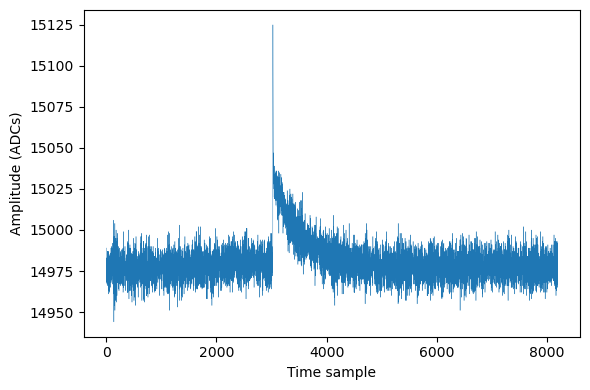

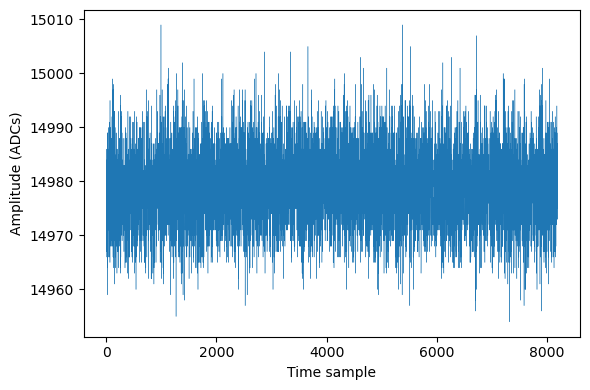

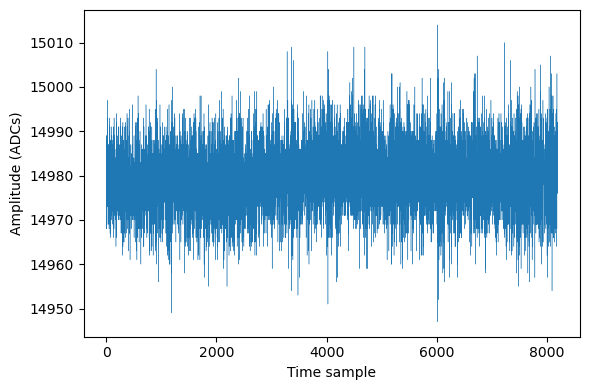

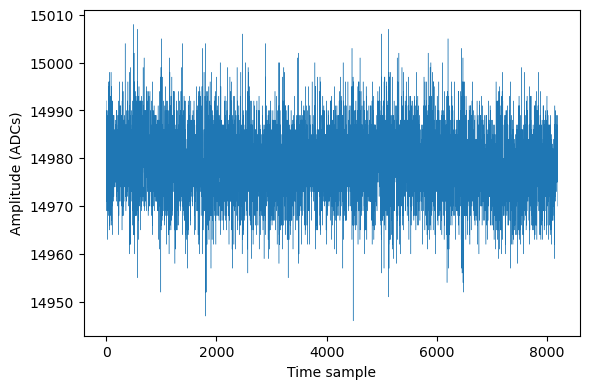

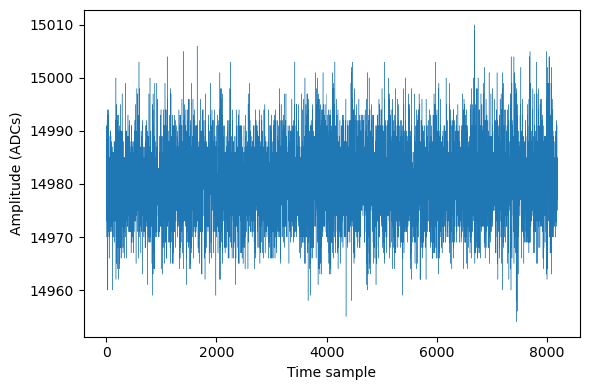

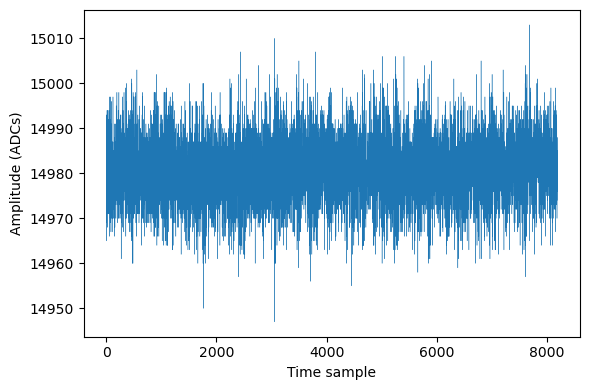

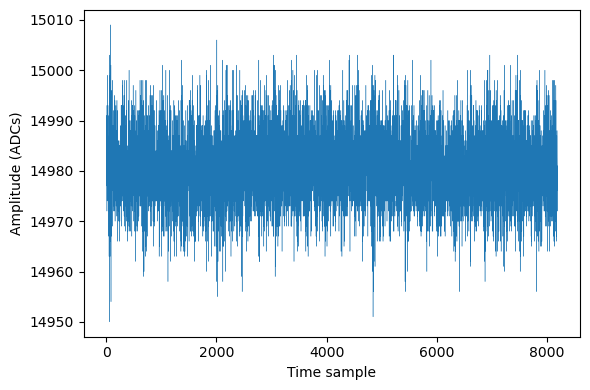

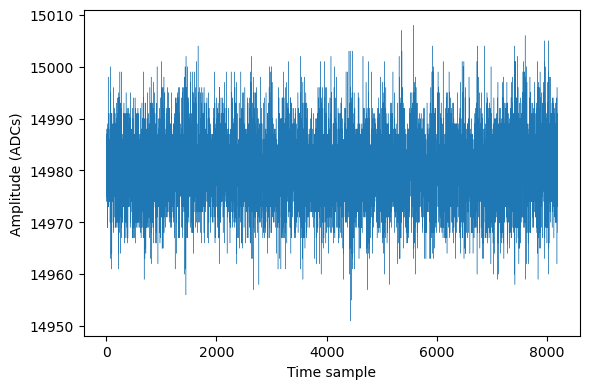

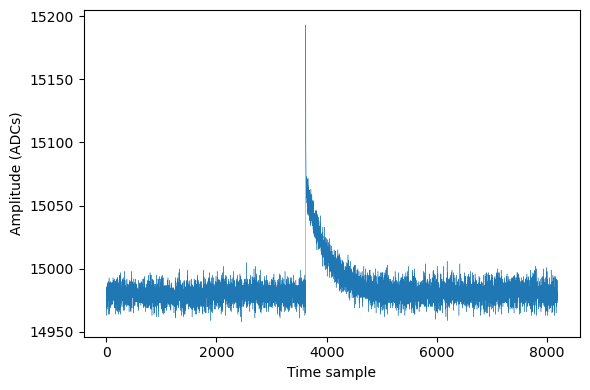

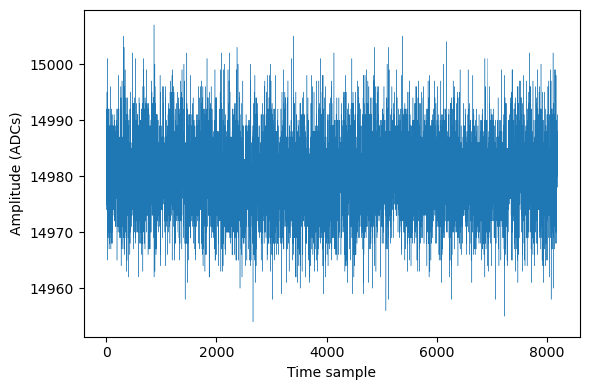

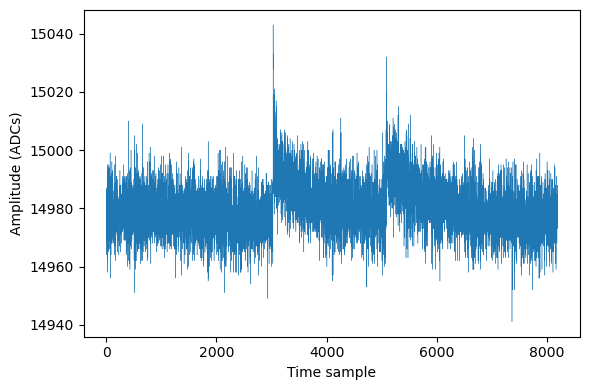

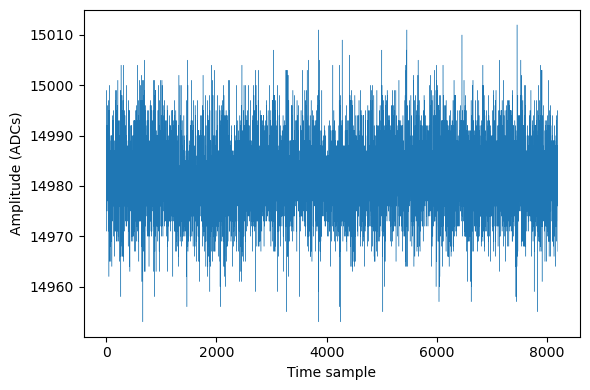

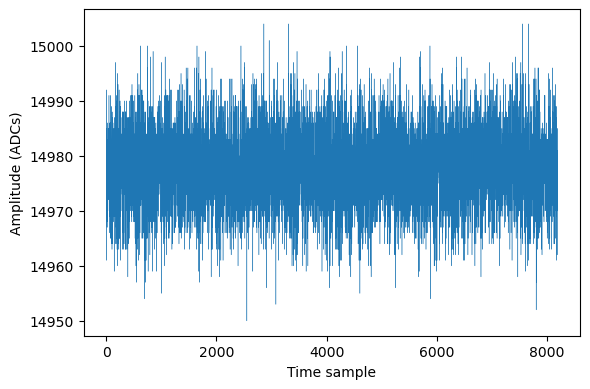

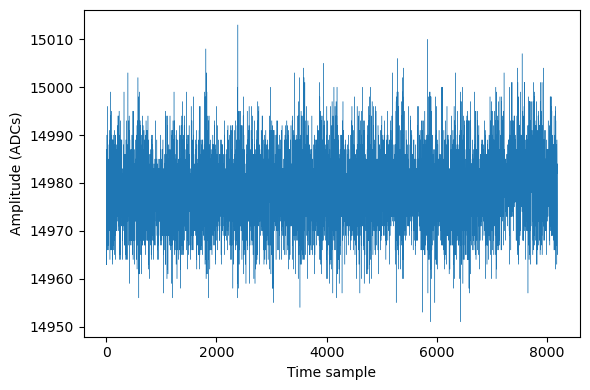

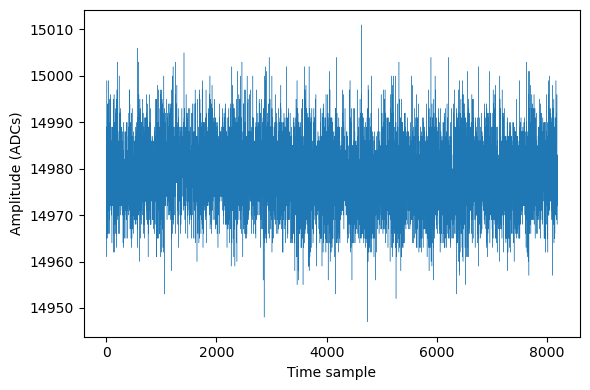

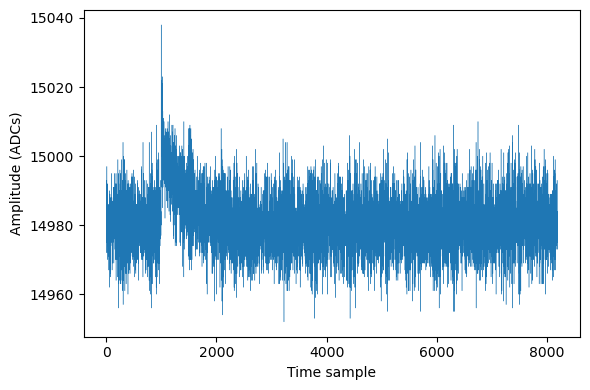

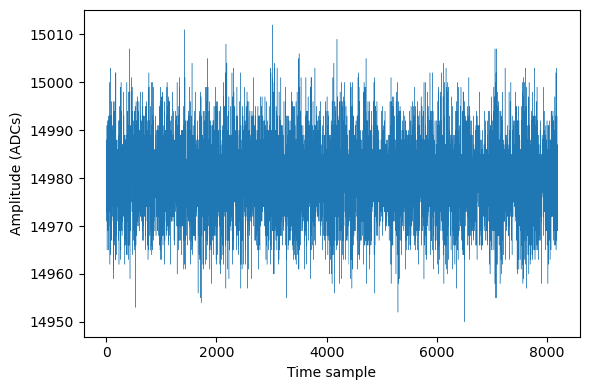

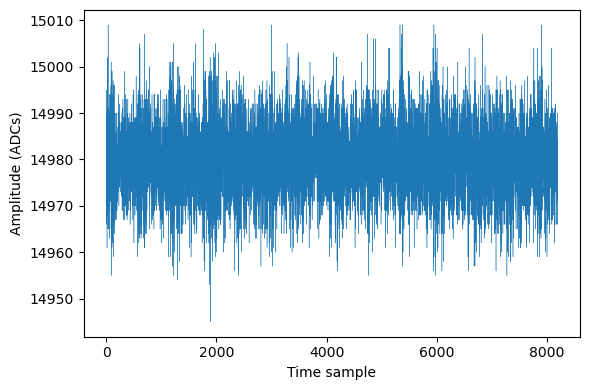

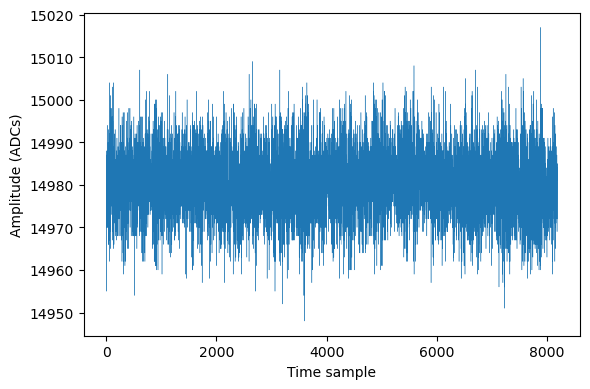

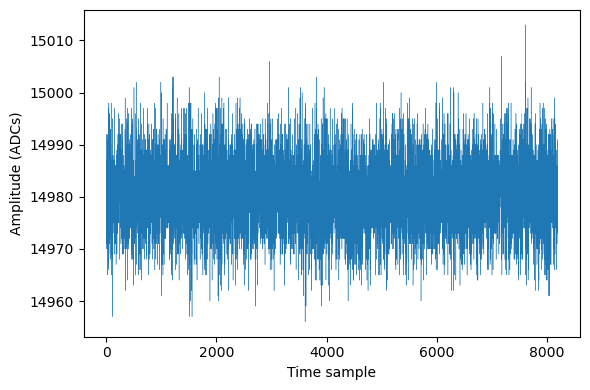

In [7]:
for i in range(20):
    wf = data_raw.values[i]
    
    plt.figure(figsize=(6, 4))
    plt.plot(np.arange(len(wf)), wf, linewidth=0.3)
    plt.xlabel('Time sample')
    plt.ylabel('Amplitude (ADCs)')
    plt.tight_layout()
    plt.show()

In [8]:
wf

array([14971, 14971, 14980, ..., 14981, 14978, 14980], dtype=uint16)

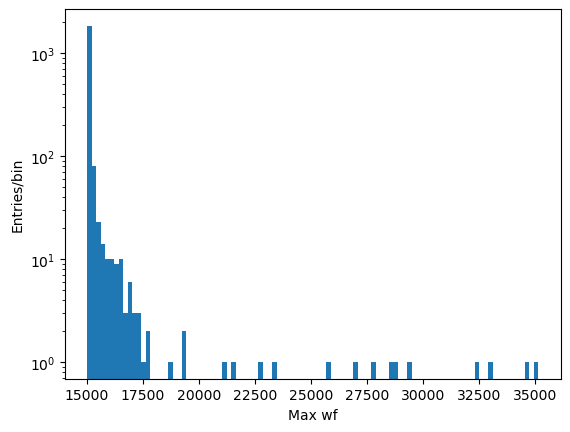

In [15]:
plt.hist([np.max(data_raw.values[i]) for i in range(len(data_raw))], bins=100, log=True)
plt.xlabel('Max wf')
plt.ylabel('Entries/bin');

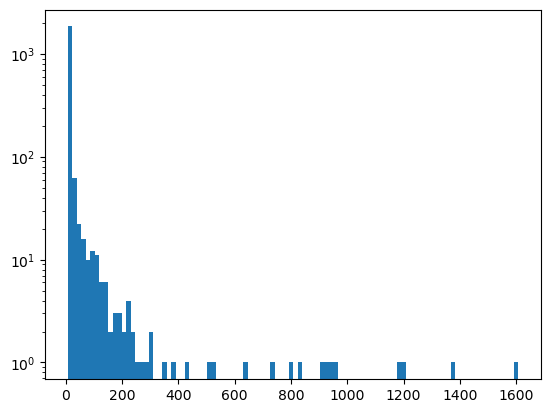

In [16]:
plt.hist([np.std(data_raw.values[i]) for i in range(len(data_raw))], bins=100, log=True);

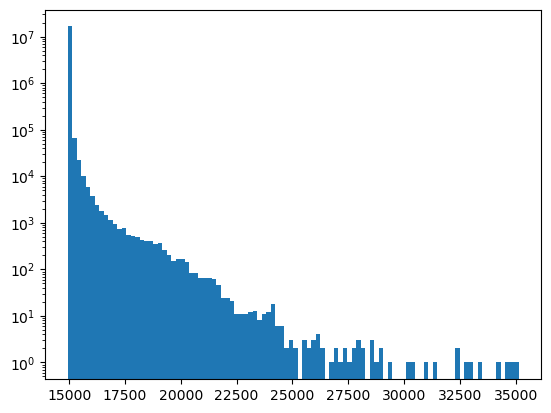

In [21]:
plt.hist(np.array([data_raw.values[i] for i in range(len(data_raw))]).flatten(), bins=100, log=True);

In [20]:
np.array([data_raw.values[i] for i in range(len(data_raw))]).flatten()

array([14989, 14989, 14972, ..., 14978, 14981, 14982], dtype=uint16)